### DataSet Lazada https://drive.google.com/drive/folders/1-Vzi94sbb4yxKwbbp_yddJ4jYbEm8rDb?usp=drive_link¶

### POSTTEST 6
- Nama : Steven Alesandro Nesta
- NIM : 2109106113
- Informatika C1'21

### IMPORT LIBRARY

In [1]:

from sklearn.impute import SimpleImputer

import tensorflow as tf
from tensorflow.keras import Sequential, layers, optimizers, datasets
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv('dataset-reviews.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203787 entries, 0 to 203786
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   itemId          203787 non-null  int64  
 1   category        203787 non-null  object 
 2   name            203787 non-null  object 
 3   rating          203787 non-null  int64  
 4   originalRating  8 non-null       float64
 5   reviewTitle     23399 non-null   object 
 6   reviewContent   107029 non-null  object 
 7   likeCount       203787 non-null  int64  
 8   upVotes         203787 non-null  int64  
 9   downVotes       203787 non-null  int64  
 10  helpful         203787 non-null  bool   
 11  relevanceScore  203787 non-null  float64
 12  boughtDate      196680 non-null  object 
 13  clientType      203787 non-null  object 
 14  retrievedDate   203787 non-null  object 
dtypes: bool(1), float64(2), int64(5), object(7)
memory usage: 22.0+ MB


In [3]:
# data['rating'] = data['rating'].apply(float)
# data['likeCount'] = data['likeCount'].apply(float)
# data['upVotes'] = data['upVotes'].apply(float)
# data['itemId'] = data['itemId'].apply(float)
# data.info()

In [4]:
X = data[["category", "likeCount", "upVotes", "relevanceScore"]]
Y = data["rating"]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

In [5]:
# Standarisasi
ssc = StandardScaler()
data[["likeCount", "upVotes", "relevanceScore"]] = ssc.fit_transform(
    data[["likeCount", "upVotes", "relevanceScore"]])

# Encoding
encoder = OrdinalEncoder()
data[["category"]]=encoder.fit_transform(data[["category"]])

In [6]:
data.isna().sum()

itemId                 0
category               0
name                   0
rating                 0
originalRating    203779
reviewTitle       180388
reviewContent      96758
likeCount              0
upVotes                0
downVotes              0
helpful                0
relevanceScore         0
boughtDate          7107
clientType             0
retrievedDate          0
dtype: int64

### Menghapus Data Null Pada Data Original Rating dengan Strategi Median

In [7]:
strategi1 = SimpleImputer(strategy="median")

data["originalRating"] = strategi1.fit_transform(data[["originalRating"]])

data.isna().sum()

itemId                 0
category               0
name                   0
rating                 0
originalRating         0
reviewTitle       180388
reviewContent      96758
likeCount              0
upVotes                0
downVotes              0
helpful                0
relevanceScore         0
boughtDate          7107
clientType             0
retrievedDate          0
dtype: int64

## menghapus atribut tipe string yg bernilai null

In [8]:
kolom_null = data.columns[data.isna().any()].tolist()
data.drop(columns=kolom_null, inplace=True)
data.isna().sum()

itemId            0
category          0
name              0
rating            0
originalRating    0
likeCount         0
upVotes           0
downVotes         0
helpful           0
relevanceScore    0
clientType        0
retrievedDate     0
dtype: int64

In [9]:
model = Sequential([
    layers.Dense(8, activation = 'relu', input_shape=[6]),
    layers.Dense(16, activation = 'relu'),
    layers.Dense(32, activation = 'relu'),
    layers.Dense(1, activation = 'sigmoid'),#104
])

model.compile(optimizer='Adam',
              loss = 'binary_crossentropy' ,
              metrics = ['accuracy'] )#122

In [10]:
class MyCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('val_accuracy') > 0.85):
      self.model.stop_training = True

In [11]:
callback_function = MyCallback()

In [12]:
model.fit(X_train, Y_train, epochs=100, validation_split=0.2, batch_size=64, callbacks=callback_function)

ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type int).

In [13]:
y_pred = model.predict(X_test)

ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type int).

In [14]:
Y_pred = np.where(Y_pred > 0.5, 1, 0).reshape(-1)
Y_pred

NameError: name 'Y_pred' is not defined

In [15]:
model.evaluate(X_test, Y_test)

ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type int).

In [16]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test, Y_pred)

NameError: name 'Y_pred' is not defined

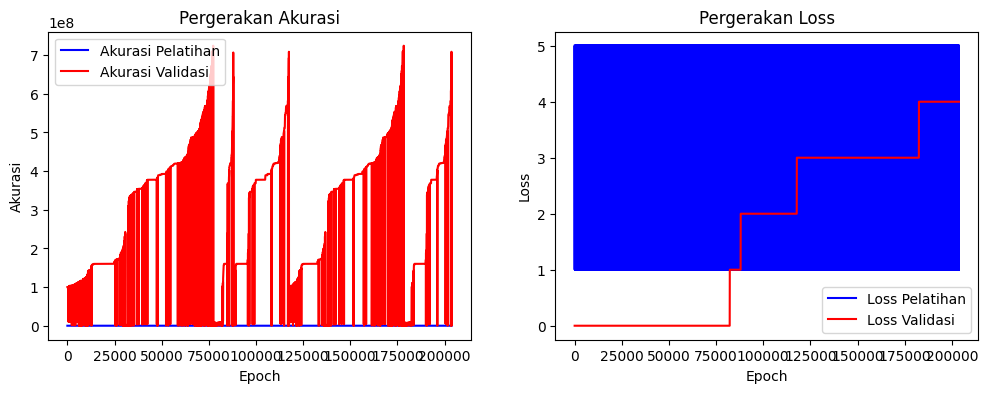

In [17]:
import matplotlib.pyplot as plt

# Anda perlu memastikan dataset telah diimpor dan diisi dengan data yang sesuai sebelum kode ini dieksekusi.

# Contoh data akurasi dan loss dari dataset
train_accuracy = data["category"]
val_accuracy = data["itemId"]
train_loss = data["rating"]
val_loss = data["category"]
epochs = range(1, len(train_accuracy) + 1)

# Plot akurasi
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs, train_accuracy, 'b', label='Akurasi Pelatihan')
plt.plot(epochs, val_accuracy, 'r', label='Akurasi Validasi')
plt.title('Pergerakan Akurasi')
plt.xlabel('Epoch')
plt.ylabel('Akurasi')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(epochs, train_loss, 'b', label='Loss Pelatihan')
plt.plot(epochs, val_loss, 'r', label='Loss Validasi')
plt.title('Pergerakan Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()
